PACKAGES

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')

DATA IMPORTING CONSISTING OF JANUARY TO JUNE

In [2]:
dataset = pd.read_csv('accidentmonth.csv', parse_dates=['Date'])

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       181 non-null    datetime64[ns]
 1   Accidents  181 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [4]:
dataset.head()

,Date,Accidents
0,2019-01-01,148
1,2019-01-02,98
2,2019-01-03,120
3,2019-01-04,118
4,2019-01-05,104


TIME SERIES DATA STRUCTURE

In [5]:
dataset=dataset.groupby('Date').sum()
dataset

,Accidents
Date,
2019-01-01,148
2019-01-02,98
2019-01-03,120
2019-01-04,118
2019-01-05,104
...,...
2019-06-26,182
2019-06-27,239
2019-06-28,241


<AxesSubplot:xlabel='Date'>

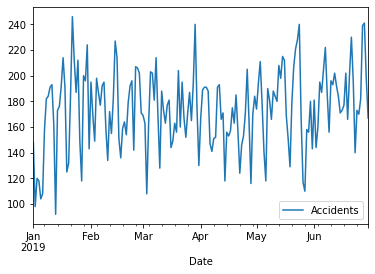

In [6]:
dataset.plot()

In [7]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

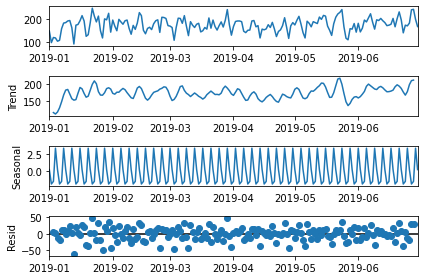

In [8]:
seasonal_decompose(dataset,model='additive',freq=4).plot();

SPLITTING DATASET

In [55]:
train=dataset[:90]
test=dataset[90:]

In [56]:
train.tail()

,Accidents
Date,
2019-03-27,165
2019-03-28,194
2019-03-29,240
2019-03-30,175
2019-03-31,130


In [57]:
test

,Accidents
Date,
2019-04-01,167
2019-04-02,189
2019-04-03,191
2019-04-04,191
2019-04-05,188
...,...
2019-06-26,182
2019-06-27,239
2019-06-28,241


HOLT WINTER MODEL

In [58]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [59]:
hwmodel=ExponentialSmoothing(train.Accidents,trend='add',seasonal='mul',seasonal_periods=4).fit()

C:\Users\Cex\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [79]:
test_pred=hwmodel.forecast(91)

In [80]:
test_pred

2019-04-01    172.399699
2019-04-02    181.431049
2019-04-03    181.656536
2019-04-04    179.420497
2019-04-05    173.569150
                 ...    
2019-06-26    207.446192
2019-06-27    204.849726
2019-06-28    198.127633
2019-06-29    208.460931
2019-06-30    208.674271
Freq: D, Length: 91, dtype: float64

<AxesSubplot:xlabel='Date'>

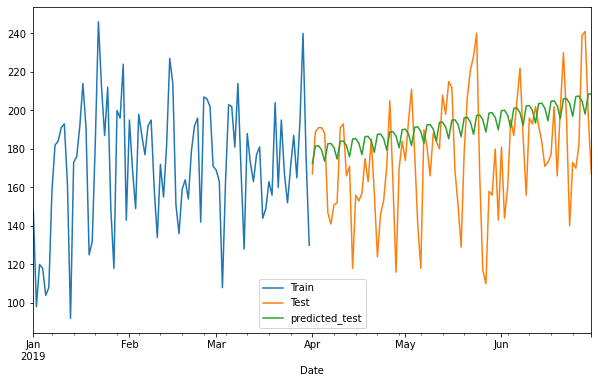

In [81]:
train['Accidents'].plot(legend=True, label='Train', figsize=(10,6))
test['Accidents'].plot(legend=True, label='Test')
test_pred.plot(legend=True, label='predicted_test')

MODEL EVALUATION

In [82]:
from sklearn.metrics import mean_squared_error

In [85]:
np.sqrt(mean_squared_error(test,test_pred))

31.697208085453344

In [84]:
dataset.Accidents.mean(), np.sqrt(dataset.Accidents.var())

(173.95027624309392, 30.33375022480806)

FINAL MODEL

In [66]:
final_model=ExponentialSmoothing(dataset.Accidents,trend='add',seasonal='mul',seasonal_periods=4).fit()

C:\Users\Cex\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [67]:
pred=final_model.forecast(30)

<AxesSubplot:xlabel='Date'>

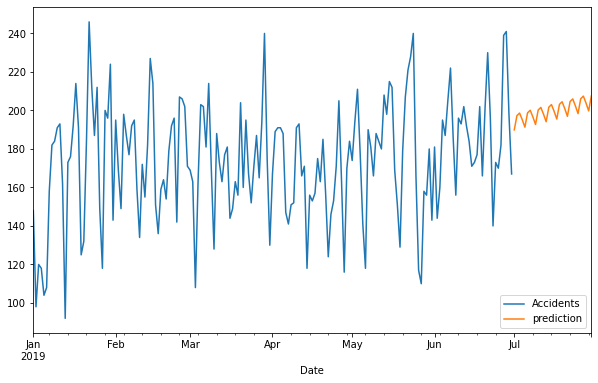

In [68]:
dataset['Accidents'].plot(legend=True, label='Accidents', figsize=(10,6))
pred.plot(legend=True, label='prediction')